In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/AAME.csv')
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [4]:
df = df.drop(['Date', 'Volume', 'Adj Close'], axis=1)

In [5]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0


In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
def split_sequence(data, window_size):
    X, y = [], [] # X: 60일간의 Open, High, Low, Close값, y: 다음 날의 Close 값

    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 3])

    return np.array(X), np.array(y)

In [9]:
X, y = split_sequence(scaled_data, 10)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0478 - val_loss: 8.5174e-05
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.2262e-04 - val_loss: 6.0002e-05
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2262e-04 - val_loss: 4.5912e-05
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4377e-04 - val_loss: 4.3886e-05
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9977e-04 - val_loss: 3.8884e-05
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8358e-04 - val_loss: 3.4665e-05
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7894e-04 - val_loss: 3.5460e-05
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5284e-04 - val_loss: 6.5230e-05
Epoch 9/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6772e-04 - val_loss: 3.7561e-05
Epoch 10/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4923e-04 - val_loss: 3.4321e-05
Epoch 11/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


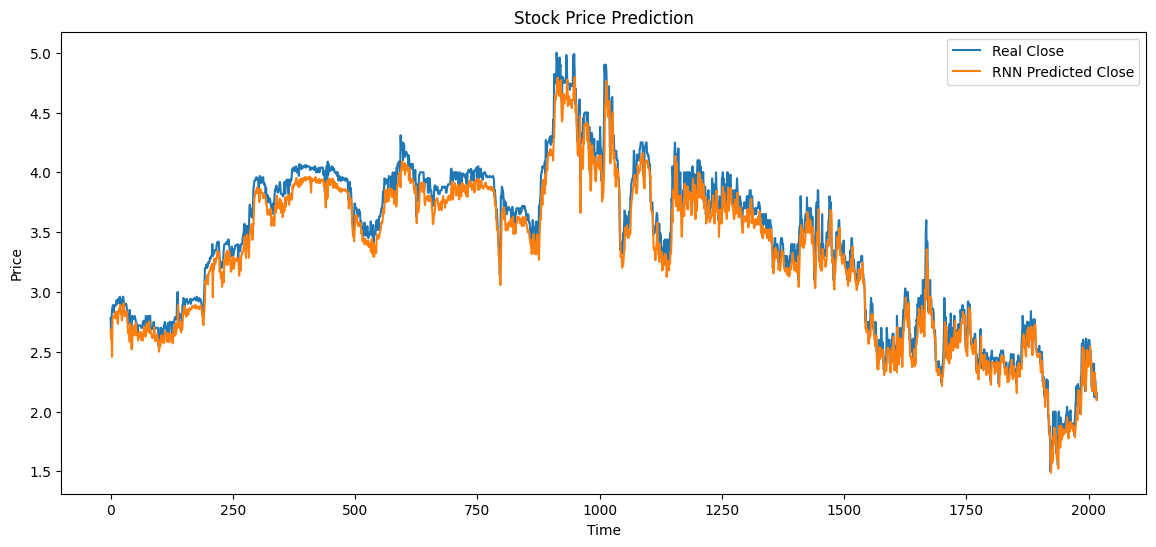

In [13]:
y_pred = model.predict(X_test)

def inverse_transform_close(y_scaled):
    dummy = np.zeros((len(y_scaled), 4))
    dummy[:, 3] = y_scaled
    return scaler.inverse_transform(dummy)[:, 3]

real_close = inverse_transform_close(y_test)
pred_close = inverse_transform_close(y_pred.flatten())

plt.figure(figsize=(14, 6))
plt.plot(real_close, label='Real Close')
plt.plot(pred_close, label='RNN Predicted Close')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()